# Introduction


In [12]:
codedir = 'sample_code/'                        # Change this to the directory where you put the code
from sys import path; path.append(codedir)
%matplotlib inline
import seaborn as sns; sns.set()

## Fetch the data and load it

In [13]:
datadir = 'public_data/'                        # Change this to the directory where you put the input data
dataname = 'movierec'
basename = datadir  + dataname
!ls $basename*

Option non valide - "movierec*".


In [14]:
import data_io
import eval
reload(data_io)
data = data_io.read_as_df(basename)                          # The data are loaded as a Pandas Data Frame
#data.to_csv(basename + '_train.csv', index=False)           # This allows saving the data in csv format

Reading public_data/movierec_train from AutoML format
Number of examples = 105000
Number of features = 54


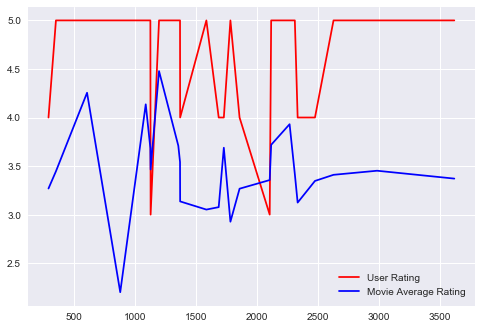

In [56]:
import matplotlib.pyplot as plt

# Note qu'une utilisateur a mis à un film

def UserRatingMovieID(userId, movieId):
    film = data['movie_id'] == movieId
    user = data['user_id'] == userId
    
    if(len(data[film & user]) > 0):
        print data[film & user].iloc[0]['target'] #test
        return data[film & user].iloc[0]['target']
    else:
        return 0 # l'utilisateur n'a pas noté ce film (trouver autre chose que 0)

#UserRatingMovieID(4611, 1357)

# Note moyenne d'un film

def MovieAverageRating(movieId):
    film = data['movie_id'] == movieId
    total = 0;
    for i in range(0, len(data[film])):
        total += data[film].iloc[i]['target']
    if len(data[film]) == 0: return 0
    return total/len(data[film])

#MovieAverageRating(3174)

# Moyenne qu'une certaine catégorie de personne a donnée à un film (sexe, job, âge...)
# Pour certaines catégorie il y a très peu de représentants (< 5), ce n'est donc pas très représentatif

def CategoryAverageRatingMovieID(userCategory, movieId):
    if not {userCategory}.issubset(data): return 0
    category = data[userCategory] == 1
    film = data['movie_id'] == movieId
    total = 0;
    for i in range(0, len(data[category & film])):
        total += data[category & film].iloc[i]['target']
    if len(data[category & film]) == 0: return 0
    return total/len(data[category & film])

#CategoryAverageRatingMovieID('age_18-24', 3174)
#CategoryAverageRatingMovieID('job_other', 3174)
#CategoryAverageRatingMovieID('gender_M', 3174)

# Moyenne qu'une certaine catégorie de personne a donnée à une genre de film
# Pour certaines catégorie il y a très peu de représentants (< 5), ce n'est donc pas très représentatif

def CategoryAverageRatingMovieGenre(userCategory, movieGenre):
    if not {userCategory}.issubset(data): return 0
    if not {movieGenre}.issubset(data): return 0
    category = data[userCategory] == 1
    genre = data[movieGenre] == 1
    total = 0;
    for i in range(0, len(data[category & genre])):
        total += data[category & genre].iloc[i]['target']
    if len(data[category & genre]) == 0: return 0
    return total/len(data[category & genre])

#CategoryAverageRatingMovieGenre('age_18-24', 'movie_genre_Sci-Fi')
#CategoryAverageRatingMovieGenre('gender_M', 'movie_genre_Action') # prends beaucoup de temps
#CategoryAverageRatingMovieGenre('gender_F', 'movie_genre_Romance') # prends beaucoup de temps

# Affiche le profil de l'utilisateur (note qu'a mis l'utilisateur aux films qu'il a vu par rapport à la note moyenne attribuée à ces films)

def ShowUserProfile(userId):
    sort_data = data.sort_values(by=['movie_id'], ascending=[True])
    user = sort_data['user_id'] == userId
    final_data = sort_data[user]
    plt.plot(final_data['movie_id'], final_data['target'], c='red')
    plt.plot(final_data['movie_id'], final_data['movie_average_rating'], c='blue')
    plt.legend(['User Rating', 'Movie Average Rating'])
    plt.show()
    return

ShowUserProfile(5103) # exemple d'utilisateur "généreux"


In [ ]:
# Tests unitaires

# UserRatingMovieID :

# Selection inexistante
assert UserRatingMovieID(100000, 100000) == 0

# MovieAverageRating :

# Selection inexistante
assert MovieAverageRating(100000) == 0

# CategoryAverageRatingMovieID :

# Category inexistante :
assert CategoryAverageRatingMovieID('test', 3174) == 0
# Film inexistant :
assert CategoryAverageRatingMovieID('job_other', 100000) == 0
# Moyenne inférieur à 5
assert CategoryAverageRatingMovieID('job_other', 3174) <= 5
# Moyenne supérieur à 0
assert CategoryAverageRatingMovieID('job_other', 3174) >= 0


# CategoryAverageRatingMovieGenre :

# Category inexistante :
assert CategoryAverageRatingMovieGenre('test', 'movie_genre_Sci-Fi') == 0
# Genre inexistant :
assert CategoryAverageRatingMovieGenre('age_18-24', 'test') == 0
# Moyenne inférieur à 5
assert CategoryAverageRatingMovieGenre('age_18-24', 'movie_genre_Sci-Fi') <= 5
# Moyenne supérieur à 0
assert CategoryAverageRatingMovieGenre('age_18-24', 'movie_genre_Sci-Fi') >= 0


# Pas de tests unitaires pour ShowUserProfile car fonction qui ne renvoie rien